In [520]:
import pandas as pd ## Data Manuplation
import numpy as np ##  Numerical data processing
import matplotlib.pyplot as plt ## Visualizatoin
import seaborn as sns   ## Visualization
import datetime as dt ## Datetime manipulation
import re
import warnings
from ipywidgets import interact
warnings.filterwarnings('ignore')

pd.set_option('max.columns',None)

In [521]:
df = pd.read_csv('IPL_match_data_1.csv')

In [522]:
df.head()

,id,season_year,match_date,inning_no,over,ball,striker,non_striker,bowler,runs_scored,extra_runs,total_runs,batting_team,bowling_team,MOS,Orange_Cap,Purple_Cap
0,335982,2008,18-04-2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir
1,335982,2008,18-04-2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir
2,335982,2008,18-04-2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir
3,335982,2008,18-04-2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir
4,335982,2008,18-04-2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir


In [523]:
df.isnull().sum()

id                   0
season_year          0
match_date           0
inning_no            0
over                 0
ball                 0
striker              0
non_striker          0
bowler               0
runs_scored          0
extra_runs           0
total_runs           0
batting_team         0
bowling_team         0
MOS                  0
Orange_Cap      123041
Purple_Cap      123041
dtype: int64

In [524]:
def check_missing(dataframe):
    temp = dataframe.isnull().sum()*100/len(df)
    temp = temp[temp > 0].sort_values(ascending=False)
    temp = pd.DataFrame(temp,columns = ['per_missing'])
    return temp

In [525]:
temp = check_missing(df)
rm_cols = list(temp[temp.per_missing >= 50].index)

In [526]:
check_missing(df)

,per_missing
Orange_Cap,90.12012
Purple_Cap,90.12012


In [527]:
len(df['bowling_team'].unique())

13

In [528]:
del df['Orange_Cap']

In [529]:
del df['Purple_Cap']

In [530]:
check_missing(df)

,per_missing


<AxesSubplot:xlabel='season_year', ylabel='count'>

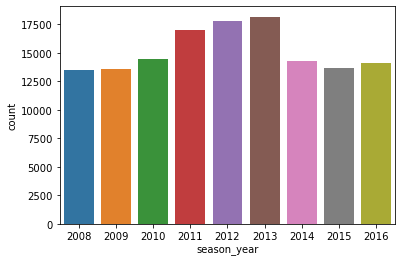

In [531]:
sns.countplot(df['season_year'])

<AxesSubplot:xlabel='season_year'>

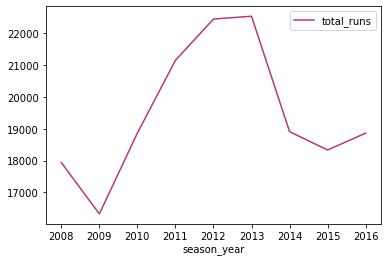

In [532]:
season = df.groupby(["season_year"])["total_runs"].sum().reset_index()
p = season.set_index("season_year")
sns.lineplot(data=p,palette="magma")

In [533]:
season

,season_year,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862


In [534]:
df2 = pd.read_csv('match_2008_2016.csv')

In [535]:
df2.head()

,Match_Id,Match_Date,Season_Year,Venue_Name,City_Name,Toss_Winner,match_Winner,toss_decision,Win_Type,Outcome_Type,Player_Name,team1,team2,Win_Margin,man_of_the_match,Total_runs,MOS,Orange_Cap,Purple_Cap
0,335987,18-04-2008 00:00,2008,M Chinnaswamy Stadium,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,140,BB McCullum,268,SR Watson,SE Marsh,Sohail Tanvir
1,335988,19-04-2008 00:00,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,Kings XI Punjab,Chennai Super Kings,33,MEK Hussey,430,SR Watson,SE Marsh,Sohail Tanvir
2,335989,19-04-2008 00:00,2008,Feroz Shah Kotla,Delhi,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,Delhi Daredevils,Rajasthan Royals,9,MF Maharoof,240,SR Watson,SE Marsh,Sohail Tanvir
3,335990,20-04-2008 00:00,2008,Wankhede Stadium,Mumbai,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,5,MV Boucher,315,SR Watson,SE Marsh,Sohail Tanvir
4,335991,20-04-2008 00:00,2008,Eden Gardens,Kolkata,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,5,DJ Hussey,184,SR Watson,SE Marsh,Sohail Tanvir


In [536]:
df2.isnull().sum()

Match_Id            0
Match_Date          0
Season_Year         0
Venue_Name          0
City_Name           0
Toss_Winner         0
match_Winner        0
toss_decision       0
Win_Type            0
Outcome_Type        0
Player_Name         0
team1               0
team2               0
Win_Margin          0
man_of_the_match    0
Total_runs          0
MOS                 0
Orange_Cap          0
Purple_Cap          0
dtype: int64

In [537]:
match_per_season = df2.groupby(["Season_Year"])["Match_Id"].count().reset_index().rename(columns={"Match_Id":"matches"})
match_per_season

,Season_Year,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,72
4,2012,74
5,2013,76
6,2014,60
7,2015,57
8,2016,60


<AxesSubplot:xlabel='season_year'>

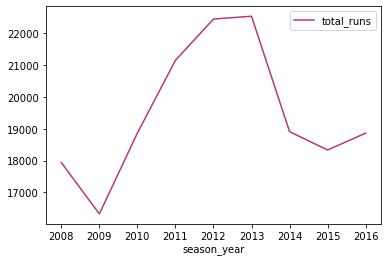

In [538]:
season = df.groupby(["season_year"])["total_runs"].sum().reset_index()
p = season.set_index("season_year")
sns.lineplot(data=p,palette="magma")

In [539]:
runs_per_season = pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season["Runs scored per match"]=runs_per_season["total_runs"]/runs_per_season["matches"]
runs_per_season.set_index("Season_Year",inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season_Year,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,72,21154,293.805556
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,57,18332,321.614035
2016,60,18862,314.366667


In [540]:
matches_played=pd.concat([df2["team1"],df2["team2"]],axis=0)
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=["Team","Total_Matches_Played"]
matches_played["match_Winner"]=df2["match_Winner"].value_counts().reset_index()["match_Winner"]
matches_played["Winning_percentage"]=matches_played["match_Winner"]*100/matches_played["Total_Matches_Played"]
matches_played

,Team,Total_Matches_Played,match_Winner,Winning_percentage
0,Mumbai Indians,140,80,57.142857
1,Royal Challengers Bangalore,137,79,57.664234
2,Kings XI Punjab,134,70,52.238806
3,Kolkata Knight Riders,132,68,51.515152
4,Delhi Daredevils,131,63,48.091603
5,Chennai Super Kings,131,63,48.091603
6,Rajasthan Royals,117,56,47.863248
7,Deccan Chargers,75,34,45.333333
8,Sunrisers Hyderabad,62,29,46.774194
9,Pune Warriors,45,12,26.666667


Mumbai Indians                 74
Kolkata Knight Riders          69
Chennai Super Kings            66
Kings XI Punjab                64
Delhi Daredevils               63
Rajasthan Royals               62
Royal Challengers Bangalore    60
Deccan Chargers                43
Sunrisers Hyderabad            30
Pune Warriors                  20
Kochi Tuskers Kerala            8
Gujarat Lions                   8
Rising Pune Supergiants         7
Name: Toss_Winner, dtype: int64

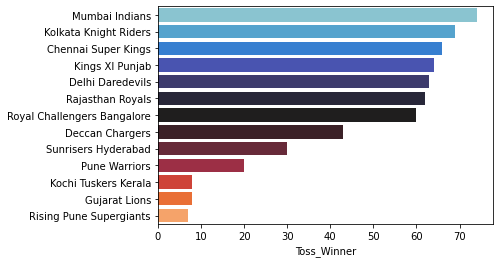

In [541]:
toss=df2["Toss_Winner"].value_counts()
sns.barplot(y=toss.index,x=toss,orient="h",palette="icefire",saturation=1)
toss

<AxesSubplot:xlabel='Season_Year', ylabel='count'>

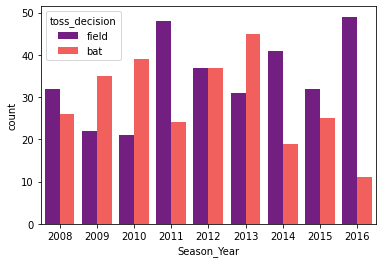

In [542]:
sns.countplot(x="Season_Year",hue="toss_decision",data=df2,palette="magma",saturation=1)

In [543]:
toss_winner_choice=df2.groupby(["toss_decision"])["Toss_Winner"].count()
toss_winner_choice

toss_decision
bat      261
field    313
Name: Toss_Winner, dtype: int64

In [544]:
df2["Win_Type"].value_counts()

wickets    307
runs       261
Tie          6
Name: Win_Type, dtype: int64

In [545]:
df2.Venue_Name[df2.Win_Type != "runs"].mode()

0             Eden Gardens
1    M Chinnaswamy Stadium
dtype: object

In [546]:
df2.Venue_Name[df2.Win_Type != "wickets"].mode()

0    MA Chidambaram Stadium, Chepauk
dtype: object

In [547]:
df2.Venue_Name[df2.Toss_Winner == "Royal Challengers Bangalore"][df2.match_Winner == "Royal Challengers Bangalore"].mode()

0    M Chinnaswamy Stadium
dtype: object

In [548]:
df2.match_Winner[df2.Win_Type!="runs"].mode()

0    Royal Challengers Bangalore
dtype: object

In [549]:
df2.match_Winner[df2.Win_Type!="Wickets"].mode()

0    Mumbai Indians
dtype: object

<AxesSubplot:ylabel='count'>

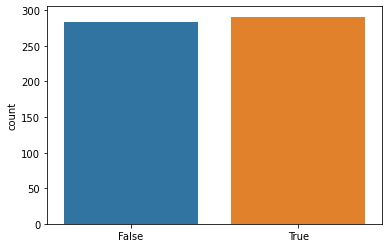

In [550]:
toss=df2["Toss_Winner"] == df2["match_Winner"]
sns.countplot(toss)

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

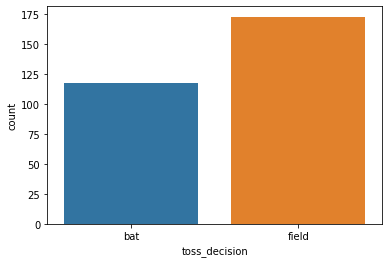

In [551]:
sns.countplot(df2.toss_decision[df2.Toss_Winner == df2.match_Winner])

In [552]:
player = (df["striker"]=="V Kohli")
df_Kohli= df[player]
df_Kohli.head()

,id,season_year,match_date,inning_no,over,ball,striker,non_striker,bowler,runs_scored,extra_runs,total_runs,batting_team,bowling_team,MOS
211,335982,2008,18-04-2008,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
212,335982,2008,18-04-2008,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
213,335982,2008,18-04-2008,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
216,335982,2008,18-04-2008,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
217,335982,2008,18-04-2008,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson


In [553]:
df2[df2["Win_Margin"] == df2["Win_Margin"].max()]

,Match_Id,Match_Date,Season_Year,Venue_Name,City_Name,Toss_Winner,match_Winner,toss_decision,Win_Type,Outcome_Type,Player_Name,team1,team2,Win_Margin,man_of_the_match,Total_runs,MOS,Orange_Cap,Purple_Cap
557,980992,14-05-2016 00:00,2016,M Chinnaswamy Stadium,Bangalore,Gujarat Lions,Royal Challengers Bangalore,field,runs,Result,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,144,AB de Villiers,332,V Kohli,V Kohli,B Kumar


In [554]:
RCB = (df["batting_team"]=="Royal Challengers Bangalore")
df_RCB=df[player]
df_RCB.head()

,id,season_year,match_date,inning_no,over,ball,striker,non_striker,bowler,runs_scored,extra_runs,total_runs,batting_team,bowling_team,MOS
211,335982,2008,18-04-2008,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
212,335982,2008,18-04-2008,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
213,335982,2008,18-04-2008,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
216,335982,2008,18-04-2008,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
217,335982,2008,18-04-2008,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson


In [555]:
match_stats = pd.read_csv('IPL_Match_Project.csv')

In [556]:
match_stats.head()

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,2008,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,2008,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,2008,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,2008,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,2008,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


### Player Analysis

In [557]:
player = (match_stats["Striker"]=="MS Dhoni")
MS_Dhoni = match_stats[player]
MS_Dhoni.head()

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
164,335988,2008,7,3,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
167,335988,2008,7,6,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
168,335988,2008,8,1,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,JR Hopes,NaN,NaN,0.0,lbw,MS Dhoni,NaN,"Punjab Cricket Association Stadium, Mohali"
950,335994,2008,16,1,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,wides,1.0,NaN,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
951,335994,2008,16,2,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,NaN,NaN,4.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"


In [558]:
bat = match_stats.groupby(['Striker']).agg({'Ball_Id': lambda x: x.count(),
                                           'runs_by_batsman': lambda x: x.sum(),
                                           'Kind_Out': lambda x: x.count()})

In [559]:
bat = pd.DataFrame(bat)
print("Type of our data :",type(bat))
bat=bat.sort_values(['runs_by_batsman','Ball_Id'],ascending=[False,False])
bat=bat.head(20)
bat.head()

Type of our data : <class 'pandas.core.frame.DataFrame'>


,Ball_Id,runs_by_batsman,Kind_Out
Striker,,,
SK Raina,3059,4106.0,122
V Kohli,3237,4105.0,115
RG Sharma,2996,3874.0,121
G Gambhir,3028,3634.0,117
CH Gayle,2359,3447.0,81


In [560]:
avg_run=bat['runs_by_batsman']/bat['Kind_Out']

In [561]:
bat['avg_of_batsman']=avg_run

In [562]:
bat

,Ball_Id,runs_by_batsman,Kind_Out,avg_of_batsman
Striker,,,,
SK Raina,3059,4106.0,122,33.655738
V Kohli,3237,4105.0,115,35.695652
RG Sharma,2996,3874.0,121,32.016529
G Gambhir,3028,3634.0,117,31.059829
CH Gayle,2359,3447.0,81,42.555556
RV Uthappa,2721,3390.0,119,28.487395
DA Warner,2440,3373.0,91,37.065934
MS Dhoni,2419,3270.0,92,35.543478
AB de Villiers,2231,3270.0,78,41.923077


In [563]:
strike_rate = bat['runs_by_batsman']*100/bat['Ball_Id']

In [564]:
bat["strike_rate"]=strike_rate
bat.head()

,Ball_Id,runs_by_batsman,Kind_Out,avg_of_batsman,strike_rate
Striker,,,,,
SK Raina,3059,4106.0,122,33.655738,134.226872
V Kohli,3237,4105.0,115,35.695652,126.814952
RG Sharma,2996,3874.0,121,32.016529,129.305741
G Gambhir,3028,3634.0,117,31.059829,120.013210
CH Gayle,2359,3447.0,81,42.555556,146.121238


In [565]:
bat.rename(columns={'Ball_Id':'Total_balls_played','runs_by_batsman':'total_runs',
                    'Kind_Out':'times_dismissal','avg_of_batsman':'avg_of_batsman',
                   'strike_rate':'strike_rate'},inplace=True)
bat.head()

,Total_balls_played,total_runs,times_dismissal,avg_of_batsman,strike_rate
Striker,,,,,
SK Raina,3059,4106.0,122,33.655738,134.226872
V Kohli,3237,4105.0,115,35.695652,126.814952
RG Sharma,2996,3874.0,121,32.016529,129.305741
G Gambhir,3028,3634.0,117,31.059829,120.013210
CH Gayle,2359,3447.0,81,42.555556,146.121238


In [566]:
bat.to_csv(r'C:\Users\udayk\Downloads\bat.csv')

In [567]:
bat=pd.read_csv('bat.csv')
bat.head(20)

,Striker,Total_balls_played,total_runs,times_dismissal,avg_of_batsman,strike_rate
0,SK Raina,3059,4106.0,122,33.655738,134.226872
1,V Kohli,3237,4105.0,115,35.695652,126.814952
2,RG Sharma,2996,3874.0,121,32.016529,129.305741
3,G Gambhir,3028,3634.0,117,31.059829,120.013210
4,CH Gayle,2359,3447.0,81,42.555556,146.121238
5,RV Uthappa,2721,3390.0,119,28.487395,124.586549
6,DA Warner,2440,3373.0,91,37.065934,138.237705
7,MS Dhoni,2419,3270.0,92,35.543478,135.179826
8,AB de Villiers,2231,3270.0,78,41.923077,146.571044
9,S Dhawan,2622,3082.0,95,32.442105,117.543860


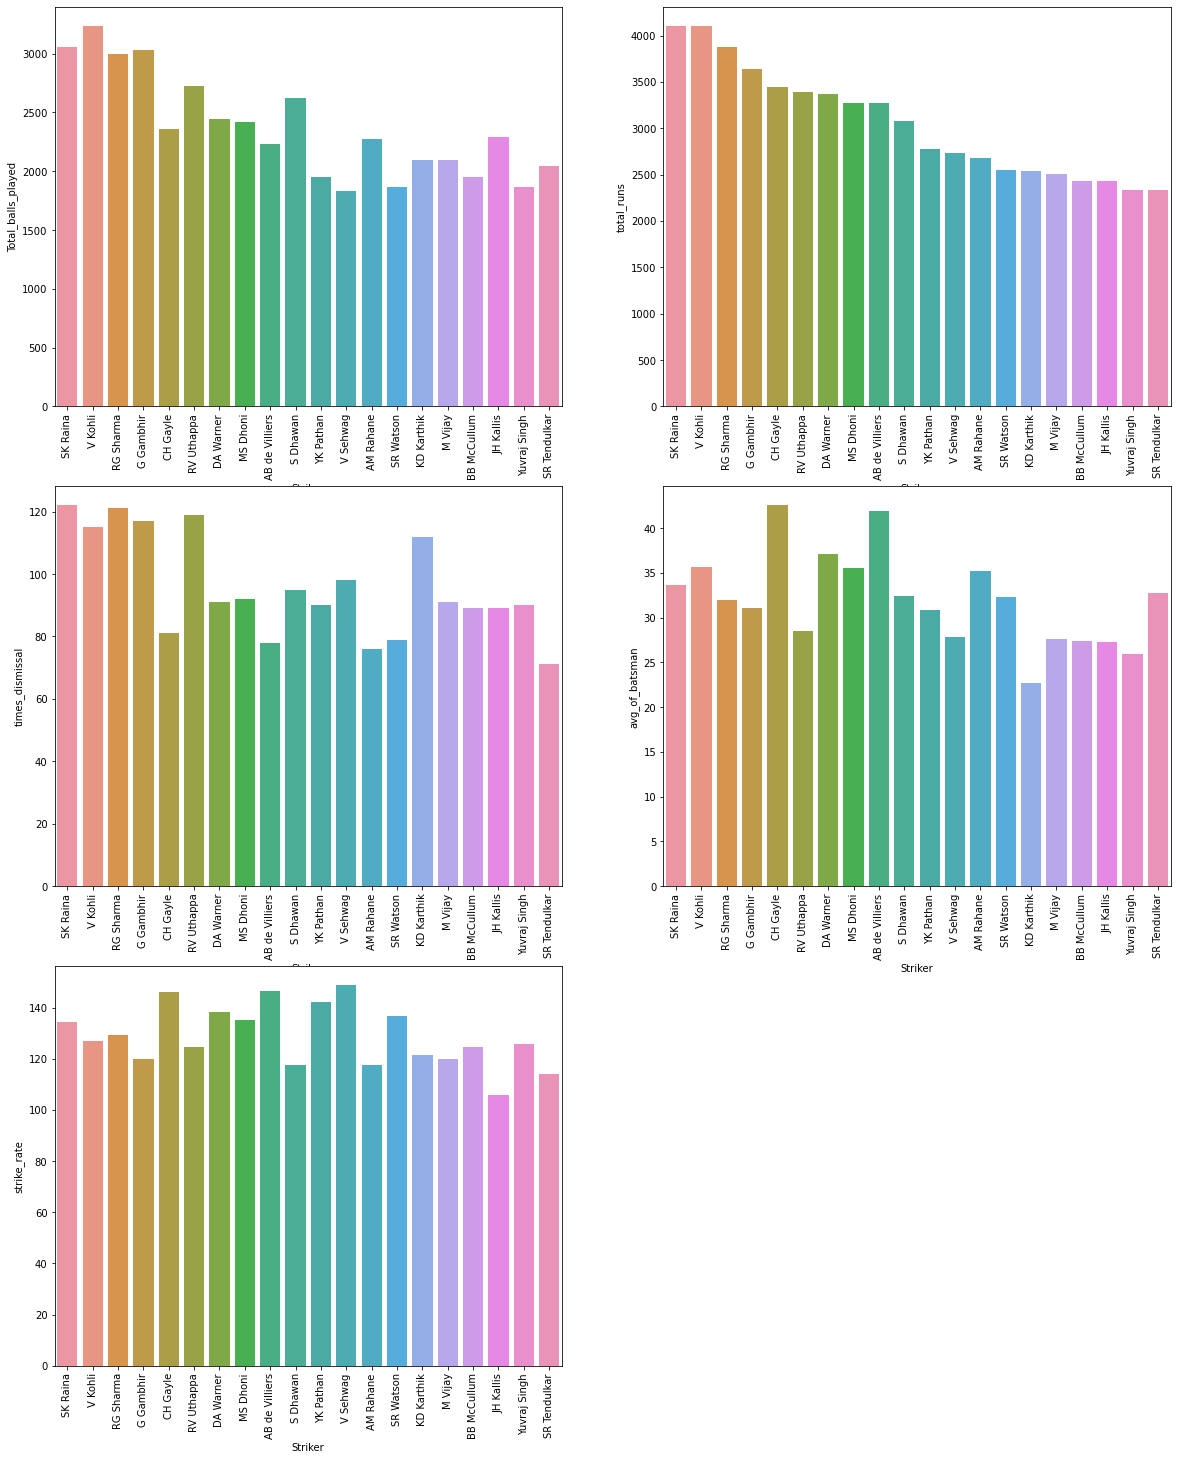

In [568]:
plt.figure(figsize=(20,25))
col = [bat['Total_balls_played'],bat['total_runs'],bat['times_dismissal'],bat['avg_of_batsman'],bat['strike_rate']]
c=1
for i in col:    
    plt.subplot(3,2,c)
    sns.barplot(x=bat['Striker'],y=i)
    plt.xticks(rotation=90)
    c+=1
plt.show()

In [569]:
match_stats['runs_by_batsman'].unique()

array([ 0., nan,  4.,  6.,  1.,  2.,  5.,  3.])

In [570]:
six_four=match_stats.loc[(match_stats['runs_by_batsman'] ==4) | (match_stats['runs_by_batsman'] ==6) ]

In [571]:
sixes = six_four.loc[six_four['runs_by_batsman']==6]
sixes = sixes.groupby(['Striker']).agg({'runs_by_batsman': lambda x:x.count()})
sixes = sixes.sort_values("runs_by_batsman",axis=0,ascending=False)

In [572]:
sixes.head()

,runs_by_batsman
Striker,
CH Gayle,252
RG Sharma,164
SK Raina,161
V Kohli,148
YK Pathan,143


In [573]:
sixes.to_csv(r'C:\Users\udayk\Downloads\seasons_sixes.csv')

In [574]:
sixes=pd.read_csv('seasons_sixes.csv')

In [575]:
sixes.head(20)

,Striker,runs_by_batsman
0,CH Gayle,252
1,RG Sharma,164
2,SK Raina,161
3,V Kohli,148
4,YK Pathan,143
5,AB de Villiers,142
6,MS Dhoni,140
7,DA Warner,134
8,Yuvraj Singh,133
9,KA Pollard,125


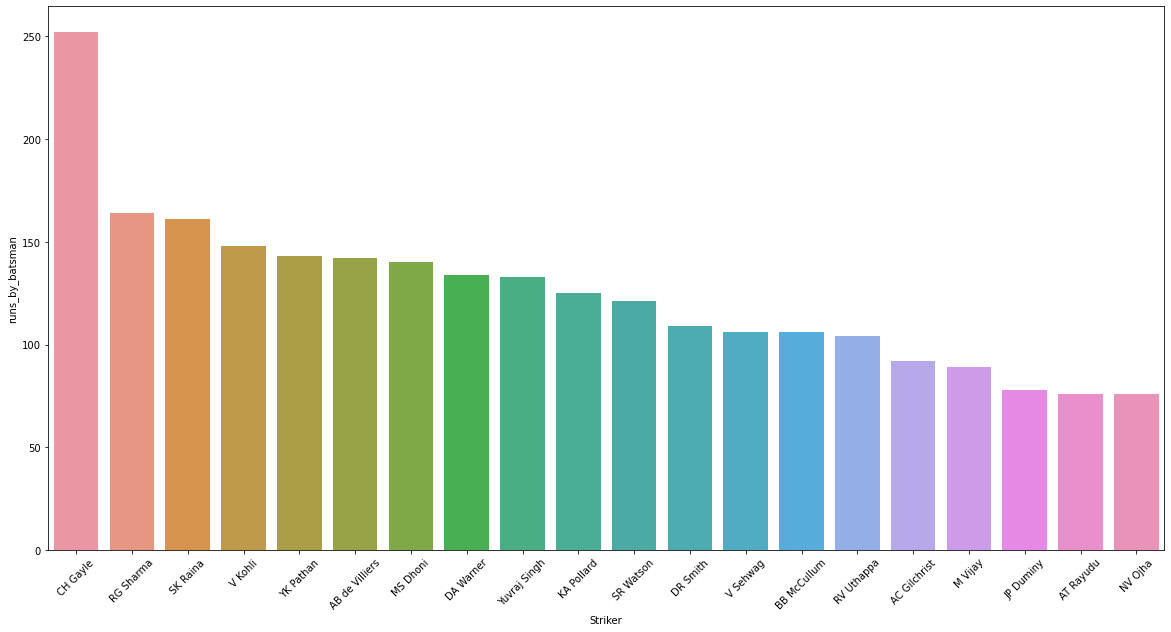

In [576]:
sixes=sixes.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=sixes['Striker'],y=sixes['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [596]:
temps=match_stats.loc[(match_stats['Over_Id']>=1) & (match_stats['Over_Id']<=6) ]
temps = temps.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum']})
print(type(temps))
print(temps.shape)

<class 'pandas.core.frame.DataFrame'>
(1135, 1)


In [597]:
temps.head(20)

runs_by_batsman
                                    sum
Over_Id Striker                        
1       A Chopra                    2.0
        A Mukund                    1.0
        AA Jhunjhunwala             0.0
        AB Barath                   1.0
        AB McDonald                 1.0
        AB de Villiers             25.0
        AC Blizzard                44.0
        AC Gilchrist              285.0
        AG Paunikar                14.0
        AJ Finch                  109.0
        AM Nayar                   11.0
        AM Rahane                 184.0
        AP Tare                    19.0
        AT Rayudu                   3.0
        AUK Pathan                 14.0
        Anirudh Singh               0.0
        Ankit Sharma                1.0
        Azhar Mahmood               0.0
        B Chipli                    3.0
        BB McCullum               208.0

In [598]:
temps = temps.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)

In [599]:
temps

runs_by_batsman
                                sum
Over_Id Striker                    
5       G Gambhir             373.0
2       G Gambhir             358.0
3       CH Gayle              350.0
        G Gambhir             337.0
4       G Gambhir             336.0
...                             ...
6       P Negi                  0.0
2       R Ashwin                0.0
        R McLaren               0.0
        RA Jadeja               0.0
4       DJ Thornely             0.0

[1135 rows x 1 columns]

In [600]:
mean_power = temps[('runs_by_batsman','sum')].mean()

In [601]:
mean_power

42.309251101321586

In [603]:
temps = temps.loc[(temps[('runs_by_batsman','sum')]>mean_power)]

In [604]:
temps

runs_by_batsman
                                sum
Over_Id Striker                    
5       G Gambhir             373.0
2       G Gambhir             358.0
3       CH Gayle              350.0
        G Gambhir             337.0
4       G Gambhir             336.0
...                             ...
3       S Sohal                44.0
1       AC Blizzard            44.0
4       LRPL Taylor            43.0
2       SA Asnodkar            43.0
6       KL Rahul               43.0

[308 rows x 1 columns]

In [605]:
temps.shape

(308, 1)

In [606]:
power_play = temps.head(20)

In [587]:
power_play

runs_by_batsman
                                 sum
Over_Id Striker                     
5       G Gambhir              373.0
2       G Gambhir              358.0
3       CH Gayle               350.0
        G Gambhir              337.0
4       G Gambhir              336.0
3       M Vijay                332.0
6       SK Raina               331.0
2       DA Warner              320.0
1       V Sehwag               310.0
3       S Dhawan               309.0
        V Sehwag               306.0
2       V Sehwag               305.0
        CH Gayle               301.0
5       DA Warner              300.0
3       BB McCullum            291.0
5       CH Gayle               290.0
3       DA Warner              289.0
5       SK Raina               288.0
1       AC Gilchrist           285.0
4       RV Uthappa             284.0

In [621]:
temps=match_stats.loc[(match_stats['Over_Id']>5) & (match_stats['Over_Id']<15) ]
temps = temps.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum']})
print(type(temps))
print(temps.shape)
temps.head()

<class 'pandas.core.frame.DataFrame'>
(2104, 1)


runs_by_batsman
                                   sum
Over_Id Striker                       
6       A Ashish Reddy             5.0
        A Chopra                   9.0
        A Flintoff                 0.0
        A Mishra                   1.0
        A Mukund                   4.0

In [622]:
temps = temps.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)

In [608]:
temps.head()

runs_by_batsman
                                   sum
Over_Id Striker                       
6       A Ashish Reddy             5.0
        A Chopra                   9.0
        A Flintoff                 0.0
        A Mishra                   1.0
        A Mukund                   4.0

In [623]:
mean_middle = temps[('runs_by_batsman','sum')].mean()
print(mean_middle)

34.56368821292776


In [609]:
temps = temps.loc[(temps[('runs_by_batsman','sum')]>mean_middle)]

In [624]:
middle_order_bat = temps.head(30)
middle_order_bat = middle_order_bat.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)
middle_order_bat

runs_by_batsman
                                   sum
Over_Id Striker                       
6       SK Raina                 331.0
        G Gambhir                276.0
11      SK Raina                 271.0
8       SK Raina                 271.0
9       SK Raina                 270.0
13      RG Sharma                262.0
12      V Kohli                  261.0
14      SK Raina                 261.0
12      RG Sharma                260.0
10      SK Raina                 259.0
11      V Kohli                  257.0
8       V Kohli                  256.0
13      SK Raina                 253.0
6       DA Warner                251.0
12      SK Raina                 249.0
14      RG Sharma                248.0
        KD Karthik               245.0
13      YK Pathan                245.0
10      V Kohli                  243.0
9       V Kohli                  242.0
14      Yuvraj Singh             242.0
11      RG Sharma                238.0
13      V Kohli                  237.0
12      YK Pathan                237.0
7       G Gambhir                232.0
        SK Raina                 227.0
12      AB de Villiers           227.0
6       SR Tendulkar             223.0
        S Dhawan                 222.0
        AC Gilchrist             222.0

In [625]:
middle_order_bat.to_csv(r'C:\Users\udayk\Downloads\middle_order_bat.csv')

In [627]:
middle_order_bat=pd.read_csv(r'C:\Users\udayk\Downloads\middle_order_batsman.csv')
middle_order_bat

,Over_Id,Striker,runs_by_batsman
0,6,SK Raina,331
1,6,G Gambhir,276
2,11,SK Raina,271
3,8,SK Raina,271
4,9,SK Raina,270
5,13,RG Sharma,262
6,12,V Kohli,261
7,14,SK Raina,261
8,12,RG Sharma,260
9,10,SK Raina,259


In [333]:
temp=match_stats.loc[(match_stats['Over_Id']>=16) & (match_stats['Over_Id']<=20) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum']})
print(type(temp))
print(temp.shape)
temp.head()

<class 'pandas.core.frame.DataFrame'>
(1555, 1)


runs_by_batsman
                                   sum
Over_Id Striker                       
16      A Ashish Reddy            22.0
        A Chopra                   1.0
        A Flintoff                 3.0
        A Kumble                   5.0
        A Mishra                  15.0

In [334]:
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)
temp.head()

,,runs_by_batsman
,,sum
Over_Id,Striker,
17,MS Dhoni,412.0
20,MS Dhoni,405.0
18,MS Dhoni,392.0
19,MS Dhoni,366.0
16,MS Dhoni,333.0


In [335]:
finisher = temp.head(20)

In [336]:
finisher

runs_by_batsman
                                   sum
Over_Id Striker                       
17      MS Dhoni                 412.0
20      MS Dhoni                 405.0
18      MS Dhoni                 392.0
19      MS Dhoni                 366.0
16      MS Dhoni                 333.0
17      RG Sharma                310.0
        KA Pollard               292.0
16      AB de Villiers           290.0
18      KA Pollard               269.0
16      Yuvraj Singh             263.0
        V Kohli                  261.0
18      AB de Villiers           253.0
19      AB de Villiers           250.0
16      RG Sharma                249.0
18      RG Sharma                247.0
        JP Duminy                243.0
17      AB de Villiers           242.0
        YK Pathan                234.0
16      YK Pathan                228.0
19      KA Pollard               226.0

In [337]:
match_stats.head()

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,2008,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,2008,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,2008,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,2008,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,2008,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [338]:
player = (match_stats["Striker"]=="MS Dhoni")
MS_Dhoni=match_stats[player]

In [339]:
MS_Dhoni

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
164,335988,2008,7,3,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
167,335988,2008,7,6,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
168,335988,2008,8,1,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,JR Hopes,NaN,NaN,0.0,lbw,MS Dhoni,NaN,"Punjab Cricket Association Stadium, Mohali"
950,335994,2008,16,1,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,wides,1.0,NaN,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
951,335994,2008,16,2,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,NaN,NaN,4.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135695,981010,2016,20,3,2,Rising Pune Supergiants,Kings XI Punjab,Mohammad Hafeez,MS Dhoni,R Ashwin,AR Patel,NaN,NaN,6.0,NaN,NaN,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
135696,981010,2016,20,4,2,Rising Pune Supergiants,Kings XI Punjab,Mohammad Hafeez,MS Dhoni,R Ashwin,AR Patel,NaN,NaN,0.0,NaN,NaN,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
135697,981010,2016,20,5,2,Rising Pune Supergiants,Kings XI Punjab,Mohammad Hafeez,MS Dhoni,R Ashwin,AR Patel,NaN,NaN,4.0,NaN,NaN,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
135698,981010,2016,20,6,2,Rising Pune Supergiants,Kings XI Punjab,Mohammad Hafeez,MS Dhoni,R Ashwin,AR Patel,NaN,NaN,6.0,NaN,NaN,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...


In [340]:
MS_Dhoni['Kind_Out'].unique()

array([nan, 'lbw', 'run out', 'caught', 'caught and bowled', 'bowled',
       'stumped'], dtype=object)

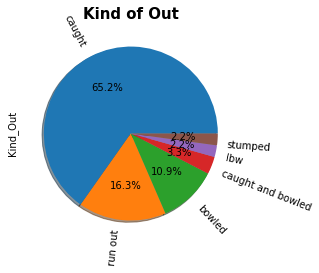

In [341]:
MS_Dhoni["Kind_Out"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,rotatelabels=True)
plt.title("Kind of Out",fontweight="bold",fontsize=15)
plt.show()

In [342]:
MS_Dhoni.to_csv(r'C:\Users\udayk\Downloads\MS_Dhoni.csv')

In [343]:
player = (match_stats["Striker"]=="SK Raina")
SK_Raina=match_stats[player]

In [344]:
SK_Raina

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
169,335988,2008,8,2,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
172,335988,2008,8,5,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,6.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
173,335988,2008,8,6,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,0.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
175,335988,2008,9,2,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,IK Pathan,NaN,NaN,4.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
176,335988,2008,9,3,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135772,981012,2016,12,5,2,Gujarat Lions,Mumbai Indians,BB McCullum,SK Raina,DR Smith,Harbhajan Singh,NaN,NaN,1.0,NaN,NaN,NaN,Green Park
135775,981012,2016,13,2,2,Gujarat Lions,Mumbai Indians,BB McCullum,SK Raina,DR Smith,JJ Bumrah,NaN,NaN,0.0,caught,SK Raina,JC Buttler,Green Park
136531,419126,2010,1,3,3,Chennai Super Kings,Kings XI Punjab,RT Ponting,SK Raina,JA Morkel,J Theron,NaN,NaN,2.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
136532,419126,2010,1,4,3,Chennai Super Kings,Kings XI Punjab,RT Ponting,SK Raina,JA Morkel,J Theron,NaN,NaN,6.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"


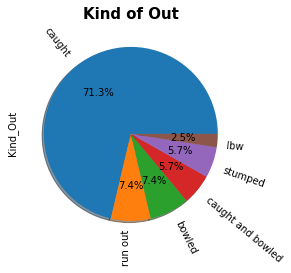

In [345]:
SK_Raina["Kind_Out"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,rotatelabels=True)
plt.title("Kind of Out",fontweight="bold",fontsize=15)
plt.show()

In [346]:
SK_Raina.to_csv(r'C:\Users\udayk\Downloads\SK_Raina.csv')

In [347]:
caps = pd.read_csv('IPL_caps.csv')

In [348]:
caps

,Season_Id,Season_Year,Man_of_the_Series,Orange_Cap,Purple_Cap
0,1,2008,SR Watson,SE Marsh,Sohail Tanvir
1,2,2009,AC Gilchrist,ML Hayden,RP Singh
2,3,2010,SR Tendulkar,SR Tendulkar,PP Ojha
3,4,2011,CH Gayle,CH Gayle,SL Malinga
4,5,2012,SP Narine,CH Gayle,M Morkel
5,6,2013,SR Watson,MEK Hussey,DJ Bravo
6,7,2014,GJ Maxwell,RV Uthappa,MM Sharma
7,8,2015,AD Russell,DA Warner,DJ Bravo
8,9,2016,V Kohli,V Kohli,B Kumar


In [349]:
temp=match_stats.loc[(match_stats['Over_Id']>=1) & (match_stats['Over_Id']<6) ]
temp = temp.groupby(['Over_Id','bowler']).agg({'Kind_Out':['count']})

In [350]:
temp

Kind_Out
                      count
Over_Id bowler             
1       A Chandila        5
        A Kumble          2
        A Mishra          1
        A Nehra           6
        A Singh           2
...                     ...
5       WPUJC Vaas        3
        YA Abdulla        5
        YK Pathan         2
        YS Chahal         2
        Z Khan            8

[868 rows x 1 columns]

In [351]:
temp.to_csv(r'C:\Users\udayk\Downloads\temp.csv')

In [352]:
kind_out = pd.read_csv("wickets.csv")

In [353]:
kind_out

,Over_Id,bowler,Kind_Out
0,1,A Chandila,5
1,1,A Kumble,2
2,1,A Mishra,1
3,1,A Nehra,6
4,1,A Singh,2
...,...,...,...
863,5,WPUJC Vaas,3
864,5,YA Abdulla,5
865,5,YK Pathan,2
866,5,YS Chahal,2


In [354]:
Wickets = kind_out.groupby(["bowler"])["Kind_Out"].sum().reset_index()

In [355]:
Wickets

,bowler,Kind_Out
0,A Chandila,10
1,A Flintoff,0
2,A Kumble,2
3,A Mishra,6
4,A Mithun,1
...,...,...
250,Y Venugopal Rao,1
251,YA Abdulla,5
252,YK Pathan,12
253,YS Chahal,4


In [356]:
kind_out = Wickets.sort_values(["Kind_Out"],ascending = False)

In [357]:
wicket = kind_out.head(50)

In [358]:
wicket

,bowler,Kind_Out
254,Z Khan,49
5,A Nehra,40
162,P Kumar,37
71,DS Kulkarni,34
38,B Kumar,33
15,AB Dinda,33
85,I Sharma,32
188,RP Singh,32
87,IK Pathan,31
73,DW Steyn,30


In [359]:
MS_dhoni1 = pd.read_csv("MS_Dhoni.csv")

In [360]:
MS_dhoni1.head()

,Unnamed: 0,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,164,335988,2008,7,3,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
1,167,335988,2008,7,6,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
2,168,335988,2008,8,1,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,JR Hopes,NaN,NaN,0.0,lbw,MS Dhoni,NaN,"Punjab Cricket Association Stadium, Mohali"
3,950,335994,2008,16,1,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,wides,1.0,NaN,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
4,951,335994,2008,16,2,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,NaN,NaN,4.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"


In [361]:
MS1= MS_dhoni1.groupby(["bowler"])["Kind_Out"].count().reset_index()

In [362]:
MS1

,bowler,Kind_Out
0,A Ashish Reddy,2
1,A Kumble,0
2,A Mishra,0
3,A Mithun,0
4,A Nehra,3
...,...,...
174,Y Venugopal Rao,0
175,YK Pathan,1
176,YS Chahal,1
177,Yuvraj Singh,0


In [363]:
kind_out = MS1.sort_values(["Kind_Out"],ascending = False)

In [364]:
MS_Dhoni=kind_out.head(5)

In [365]:
MS_Dhoni

,bowler,Kind_Out
178,Z Khan,7
113,PP Ojha,7
4,A Nehra,3
75,KA Pollard,3
41,DP Nannes,2


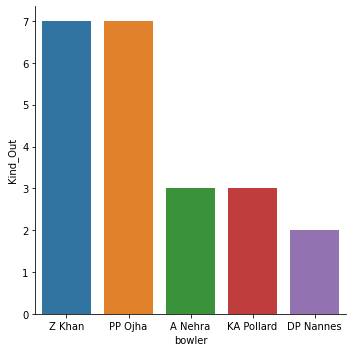

In [366]:
sns.catplot(x="bowler", y="Kind_Out", kind="bar", data=MS_Dhoni)

In [367]:
MS_Dhoni=kind_out.head(20)

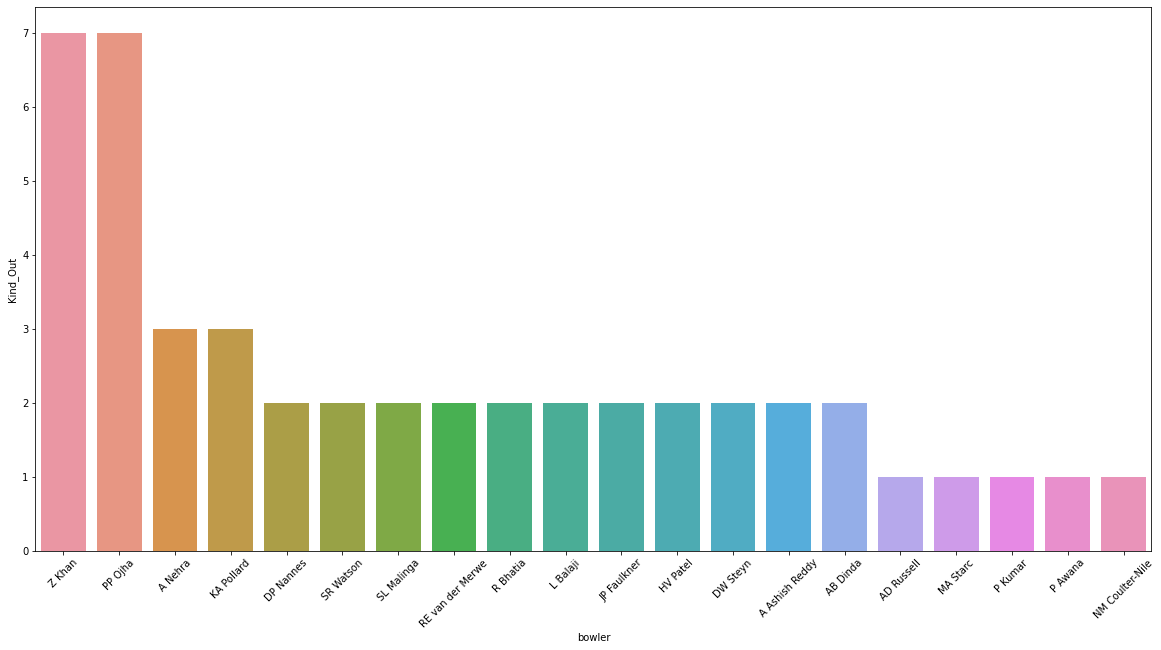

In [368]:
plt.figure(figsize=(20,10))
sns.barplot(x=MS_Dhoni['bowler'],y=MS_Dhoni['Kind_Out'])
plt.xticks(rotation=45)
plt.show()

In [369]:
SK_Raina = pd.read_csv("SK_Raina.csv")

In [370]:
SK_Raina.head()

,Unnamed: 0,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,169,335988,2008,8,2,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
1,172,335988,2008,8,5,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,6.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
2,173,335988,2008,8,6,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,0.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
3,175,335988,2008,9,2,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,IK Pathan,NaN,NaN,4.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
4,176,335988,2008,9,3,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"


In [371]:
Wickets_SK_Raina= SK_Raina.groupby(["bowler"])["Kind_Out"].count().reset_index()

In [372]:
kind_out = Wickets_SK_Raina.sort_values(["Kind_Out"],ascending = False)

In [373]:
SK_Raina= kind_out.head(20)

In [374]:
SK_Raina

,bowler,Kind_Out
121,PP Chawla,4
37,DJ Bravo,4
55,Harbhajan Singh,4
33,CH Morris,3
2,A Mishra,3
115,P Kumar,3
185,YS Chahal,3
184,YK Pathan,3
25,B Kumar,3
153,SK Warne,3


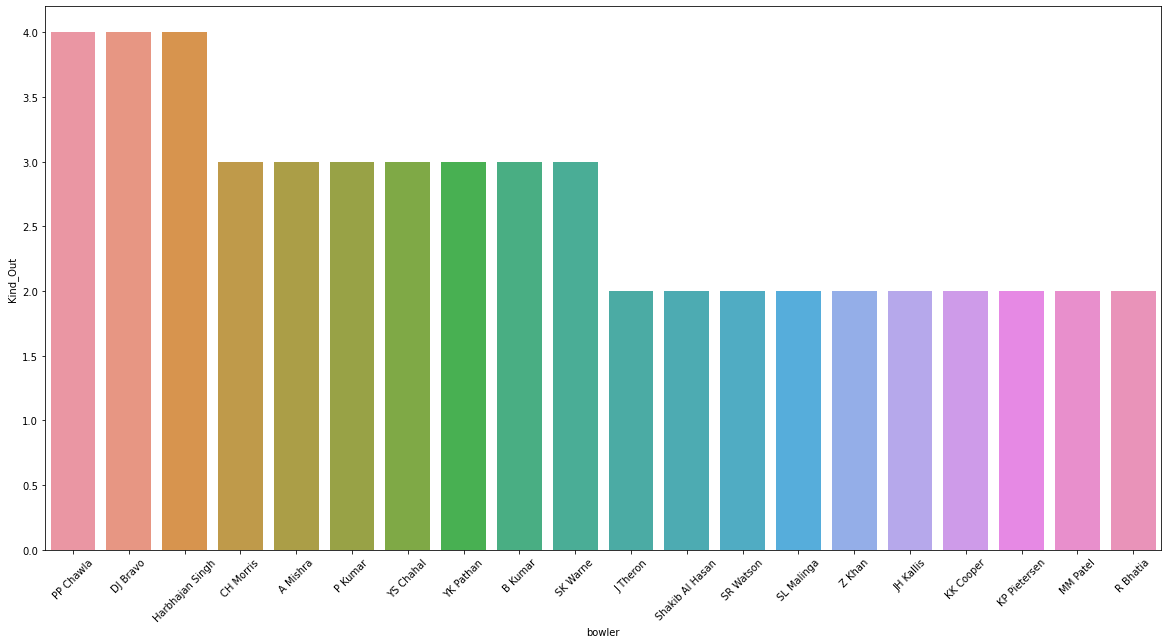

In [375]:
SK_Raina=SK_Raina.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=SK_Raina['bowler'],y=SK_Raina['Kind_Out'])
plt.xticks(rotation=45)
plt.show()

In [401]:
# Man_of_the_match
man_of_the_match = df2.groupby(df2["man_of_the_match"])["man_of_the_match"].count().sort_values(ascending=False)
man_of_the_match = man_of_the_match.to_frame().rename(columns={'man_of_the_match':'times'}).reset_index()
man_of_the_match

,man_of_the_match,times
0,CH Gayle,17
1,YK Pathan,16
2,AB de Villiers,15
3,DA Warner,14
4,RG Sharma,13
...,...,...
182,LR Shukla,1
183,LJ Wright,1
184,KMDN Kulasekara,1
185,KM Jadhav,1


In [404]:
# 100s
century = match_stats.groupby(['Striker','Match_Id']).agg({'runs_by_batsman':'sum'})
century = century[century['runs_by_batsman']>=100]
century = century.groupby(['Striker']).agg({'count'})
century.columns = century.columns.droplevel()
century = century.sort_values(by='count',ascending=False).reset_index()
century

,Striker,count
0,CH Gayle,5
1,V Kohli,4
2,AB de Villiers,3
3,AC Gilchrist,2
4,BB McCullum,2
5,V Sehwag,2
6,DA Warner,2
7,SR Watson,2
8,M Vijay,2
9,A Symonds,1


In [405]:
#50s
half_century = match_stats.groupby(['Striker','Match_Id']).agg({'runs_by_batsman':'sum'})
half_century = half_century[half_century['runs_by_batsman']>=50]
half_century = half_century[half_century['runs_by_batsman']<=100]
half_century = half_century.groupby(['Striker']).agg({'count'})
half_century.columns = half_century.columns.droplevel()
half_century = half_century.sort_values(by='count',ascending=False).reset_index()
half_century

,Striker,count
0,DA Warner,32
1,G Gambhir,31
2,RG Sharma,29
3,SK Raina,29
4,V Kohli,28
...,...,...
124,S Vidyut,1
125,Harbhajan Singh,1
126,SA Yadav,1
127,DB Ravi Teja,1


In [406]:
#30s
runs_30 = match_stats.groupby(['Striker','Match_Id']).agg({'runs_by_batsman':'sum'})
runs_30 = runs_30[runs_30['runs_by_batsman']>=30]
runs_30 = runs_30[runs_30['runs_by_batsman']<=50]
runs_30 = runs_30.groupby(['Striker']).agg({'count'})
runs_30.columns = runs_30.columns.droplevel()
runs_30 = runs_30.sort_values(by='count',ascending=False).reset_index()
runs_30

,Striker,count
0,RV Uthappa,33
1,RG Sharma,30
2,V Kohli,29
3,MS Dhoni,29
4,SK Raina,28
...,...,...
186,BCJ Cutting,1
187,S Vidyut,1
188,BB Samantray,1
189,SB Styris,1


In [408]:
runs_stat = pd.merge(century,half_century,on='Striker',how='right')
runs_stat = pd.merge(runs_stat,runs_30,on='Striker',how='right')
runs_stat = runs_stat.fillna(0)
runs_stat

,Striker,count_x,count_y,count
0,RV Uthappa,0.0,17.0,33
1,RG Sharma,1.0,29.0,30
2,V Kohli,4.0,28.0,29
3,MS Dhoni,0.0,16.0,29
4,SK Raina,1.0,29.0,28
...,...,...,...,...
186,BCJ Cutting,0.0,0.0,1
187,S Vidyut,0.0,1.0,1
188,BB Samantray,0.0,1.0,1
189,SB Styris,0.0,0.0,1


In [417]:
#Strike Rate
strike_rate = match_stats.groupby(['Striker']).agg({'Ball_Id':'count','runs_by_batsman':'mean'}).sort_values(by='runs_by_batsman',ascending=False)
strike_rate.rename(columns={'runs_by_batsman':'strike_rate'},inplace=True)
strike_rate

,Ball_Id,strike_rate
Striker,,
CR Brathwaite,40,2.184211
Umar Gul,19,2.052632
RS Sodhi,2,2.000000
KH Pandya,127,1.911290
BCJ Cutting,43,1.825000
...,...,...
Sunny Gupta,1,0.000000
Swapnil Singh,1,0.000000
A Zampa,1,0.000000


In [418]:
#runs per match
runs_per_match = match_stats.groupby(['Striker','Match_Id']).agg({'runs_by_batsman':'sum'})
runs_per_match

runs_by_batsman
Striker        Match_Id                 
A Ashish Reddy 548351               10.0
               548357                3.0
               548364                8.0
               548378               10.0
               548381                4.0
...                                  ...
Z Khan         729292                0.0
               729308                7.0
               729322                1.0
               980908                4.0
               980998                2.0

[8617 rows x 1 columns]

In [419]:
# Total runs
total_runs = runs_per_match.groupby(['Striker']).agg({'sum','mean','count'})
total_runs.rename(columns={'sum':'Total_runs','count':'Total_matches','mean':'Average_score'},inplace=True)
total_runs.columns = total_runs.columns.droplevel()
total_runs

,Total_runs,Total_matches,Average_score
Striker,,,
A Ashish Reddy,280.0,23,12.173913
A Chandila,4.0,2,2.000000
A Chopra,53.0,6,8.833333
A Flintoff,62.0,3,20.666667
A Kumble,35.0,15,2.333333
...,...,...,...
YV Takawale,192.0,10,19.200000
Yashpal Singh,47.0,4,11.750000
Younis Khan,3.0,1,3.000000


In [430]:
# sixes
total_sixes = match_stats[['Striker','runs_by_batsman']][match_stats.runs_by_batsman==6].groupby(['Striker']).agg({'runs_by_batsman':'count'})
total_sixes

,runs_by_batsman
Striker,
A Ashish Reddy,15
A Flintoff,2
A Mishra,3
A Mithun,1
A Nehra,1
...,...
Y Venugopal Rao,37
YK Pathan,143
YV Takawale,3


In [431]:
# fours
four = match_stats[['Striker','runs_by_batsman']][match_stats.runs_by_batsman==4].groupby(['Striker']).agg({'runs_by_batsman':'count'})
four

,runs_by_batsman
Striker,
A Ashish Reddy,16
A Chopra,7
A Flintoff,5
A Kumble,3
A Mishra,25
...,...
YK Pathan,231
YV Takawale,26
Yashpal Singh,5


In [432]:
# Batsman Stats
batsman_stat = pd.merge(pd.merge(pd.merge(strike_rate,total_runs,left_index=True,right_index=True),
                                total_sixes,left_index=True,right_index=True),four,left_index=True,
                       right_index=True)
batsman_stat.rename(columns={
    'Ball_Id':'Ball','strike_rate':'Strike_rate',
    'Total_runs':'Total_runs','Total_matches':'Total_matches',
    'Average_score':'Average_score',
    'runs_by_batsman_x':'Six','runs_by_batsman_y':'Four'
},inplace=True)

batsman_stat['Strike_rate']= batsman_stat['Strike_rate']*100
batsman_stat = batsman_stat.sort_values(by='Total_runs',ascending=False).reset_index()

batsman_stats = pd.merge(batsman_stat, runs_stat, on='Striker', how='left').fillna(0)
batsman_stats.rename(columns={'count_x':'100s','count_y':'50s','count':'30s'},inplace=True)
batsman_stats

,Striker,Ball,Strike_rate,Total_runs,Total_matches,Average_score,Six,Four,100s,50s,30s
0,SK Raina,3059,138.388945,4106.0,143,28.713287,161,360,1.0,29.0,28.0
1,V Kohli,3237,129.699842,4105.0,131,31.335878,148,360,4.0,28.0,29.0
2,RG Sharma,2996,131.233062,3874.0,137,28.277372,164,323,1.0,29.0,30.0
3,G Gambhir,3028,123.270014,3634.0,130,27.953846,51,422,0.0,31.0,22.0
4,CH Gayle,2359,151.383399,3447.0,91,37.879121,252,281,5.0,21.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
266,P Sahu,13,146.153846,19.0,2,9.500000,1,1,0.0,0.0,0.0
267,R Bishnoi,17,111.764706,19.0,3,6.333333,2,1,0.0,0.0,0.0
268,BJ Haddin,11,163.636364,18.0,1,18.000000,1,2,0.0,0.0,0.0
269,JJ van der Wath,17,112.500000,18.0,3,6.000000,1,1,0.0,0.0,0.0


In [426]:
batsman_stats.to_csv(r'C:\Users\udayk\Downloads\batsman_stats.csv')

In [460]:
player_stats=pd.read_csv(r'C:\Users\udayk\Downloads\batsman_stats.csv')
player_stats

,Striker,Ball,Strike_rate,Total_runs,Total_matches,Average_score,Six,Four,100s,50s,30s
0,SK Raina,3059,138.388945,4106,143,28.713287,161,360,1,29,28
1,V Kohli,3237,129.699842,4105,131,31.335878,148,360,4,28,29
2,RG Sharma,2996,131.233062,3874,137,28.277372,164,323,1,29,30
3,G Gambhir,3028,123.270014,3634,130,27.953846,51,422,0,31,22
4,CH Gayle,2359,151.383399,3447,91,37.879121,252,281,5,21,16
...,...,...,...,...,...,...,...,...,...,...,...
266,P Sahu,13,146.153846,19,2,9.500000,1,1,0,0,0
267,R Bishnoi,17,111.764706,19,3,6.333333,2,1,0,0,0
268,BJ Haddin,11,163.636364,18,1,18.000000,1,2,0,0,0
269,JJ van der Wath,17,112.500000,18,3,6.000000,1,1,0,0,0


In [475]:
dict(player_stats.dtypes)

{'Striker': dtype('O'),
 'Ball': dtype('int64'),
 'Strike_rate': dtype('float64'),
 'Total_runs': dtype('int64'),
 'Total_matches': dtype('int64'),
 'Average_score': dtype('float64'),
 'Six': dtype('int64'),
 'Four': dtype('int64'),
 '100s': dtype('int64'),
 '50s': dtype('int64'),
 '30s': dtype('int64')}

In [469]:
player_stats_20 = player_stats.head(20)
#sns.catplot(x="Striker", y="Total_runs", kind="bar", data=player_stats_10)

In [473]:
num_cols=[col for col in player_stats_20.columns
     if col not in player_stats_20.select_dtypes('O').columns]

def create_univariate_num_analysis(col):
    #fig,ax = plt.subplots()
    plt.figure(figsize=(20,10))
    sns.barplot(x="Striker",y=col,data=player_stats_20,palette='flare')
    #sns.distplot(df2[col].apply(np.log),ax=ax[1,1])
    # set the spacing between subplots
    #fig.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

interact(create_univariate_num_analysis,col=num_cols)

interactive(children=(Dropdown(description='col', options=('Ball', 'Strike_rate', 'Total_runs', 'Total_matches…

<function __main__.create_univariate_num_analysis(col)>

In [490]:
wickets = wicket.head(35)
num_cols=[col for col in wickets.columns
     if col not in wickets.select_dtypes('O').columns]

def create_univariate_num_analysis(col):
    #fig,ax = plt.subplots()
    plt.figure(figsize=(20,10))
    sns.barplot(x="bowler",y=col,data=wickets)
    #sns.distplot(df2[col].apply(np.log),ax=ax[1,1])
    # set the spacing between subplots
    #fig.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

interact(create_univariate_num_analysis,col=num_cols)

interactive(children=(Dropdown(description='col', options=('Kind_Out',), value='Kind_Out'), Output()), _dom_cl…

<function __main__.create_univariate_num_analysis(col)>

<AxesSubplot:xlabel='Striker', ylabel='runs_by_batsman'>

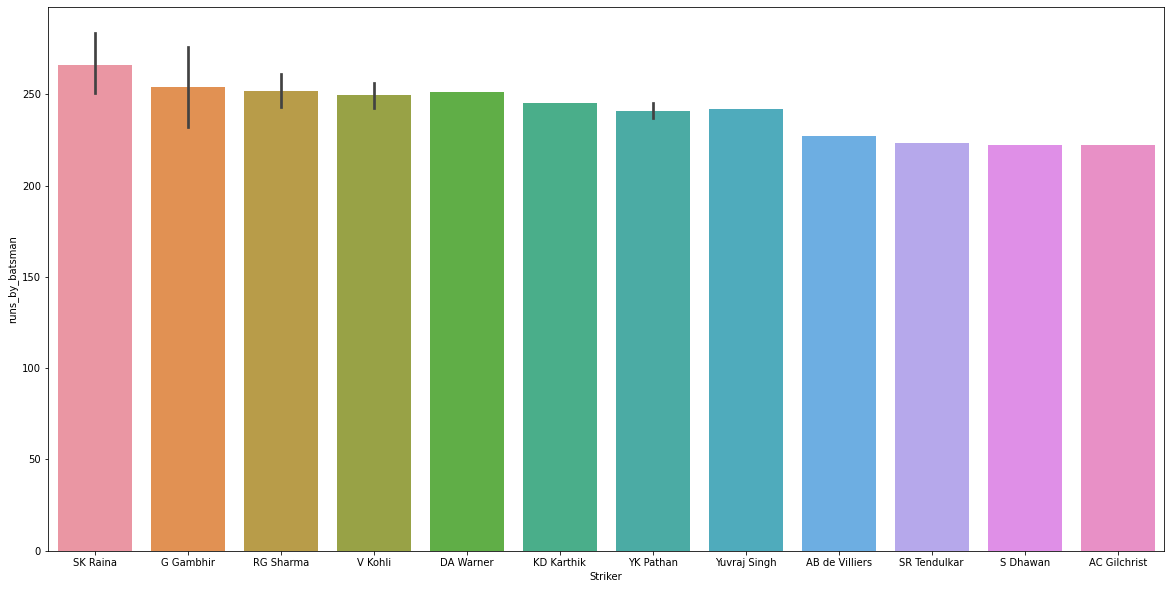

In [629]:
middle_order_bat_30 = middle_order_bat.head(30)
plt.figure(figsize=(20,10))
sns.barplot(x="Striker",y="runs_by_batsman",data=middle_order_bat_30)